## Introduction to the Decision Tree API

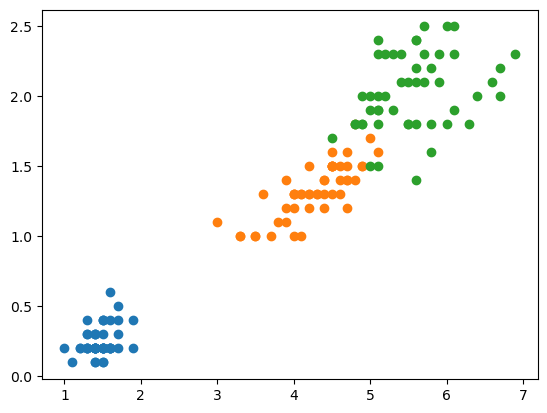

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

plt.show()

In [2]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2,criterion='entropy')
tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

/var/folders/dx/1rczl6h97j97y80gd0snfrxh0000gn/T/ipykernel_58292/3793930780.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_map)


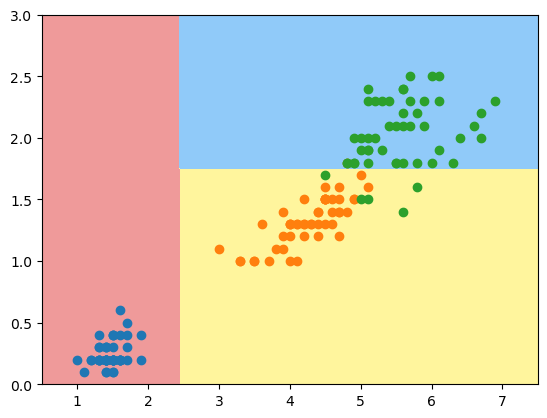

In [3]:
#找到模型的决策边界，并绘制图像(此方法所用到的api不需要掌握，能够调用就行)
def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_map = ListedColormap(["#EF9A9A","#FFF59D","#90CAF9"])

    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_map)

plot_decision_boundary(tree,axis=[0.5,7.5,0,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

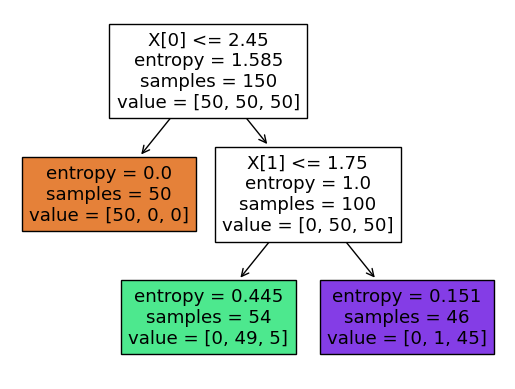

In [4]:
from sklearn.tree import plot_tree
plot_tree(tree,filled = True)
plt.show()

/var/folders/dx/1rczl6h97j97y80gd0snfrxh0000gn/T/ipykernel_58292/2022053263.py:28: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_map)


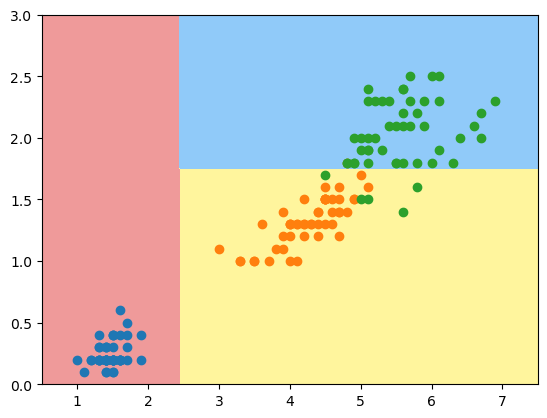

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target

from sklearn.tree import DecisionTreeClassifier

#注意：此处传入的是"gini"而不是"entropy"，默认criterion='gini'
tree = DecisionTreeClassifier(max_depth=2,criterion="gini")
tree.fit(X,y)

def plot_decision_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_map = ListedColormap(["#EF9A9A","#FFF59D","#90CAF9"])

    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_map)

plot_decision_boundary(tree,axis=[0.5,7.5,0,3])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])
plt.show()

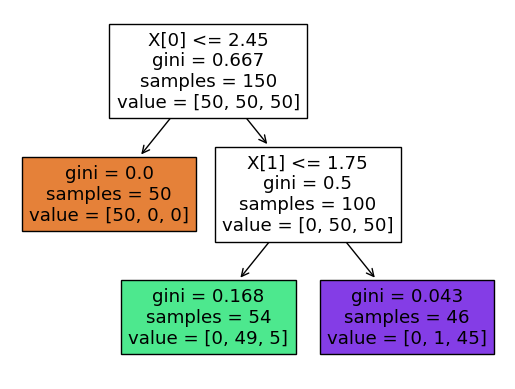

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(tree,filled=True)
plt.show()

## Titanic Survival Analysis

In [7]:
#1.1导入数据
import  pandas as pd
#1.2.利用pandas的read.csv模块从互联网中收集泰坦尼克号数据集
titanic=pd.read_csv("../data/Titanic.csv")

In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
#特征选择，这里根据对泰坦尼克号的了解，sex，age，pclass作为判断生还的三个主要因素。
X = titanic[['Pclass','Age','Sex']]
#缺失值填充
y = titanic['Survived']
X['Age'].fillna(X['Age'].mean(),inplace = True)

/var/folders/dx/1rczl6h97j97y80gd0snfrxh0000gn/T/ipykernel_58292/4252246192.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(X['Age'].mean(),inplace = True)


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     891 non-null    float64
 2   Sex     891 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 21.0+ KB


In [11]:
X.head()

,Pclass,Age,Sex
0,3,22.0,male
1,1,38.0,female
2,3,26.0,female
3,1,35.0,female
4,3,35.0,male


In [12]:
X.isnull().sum()

Pclass    0
Age       0
Sex       0
dtype: int64

In [13]:
# one-hot编码
X = pd.get_dummies(X)
X.head()

,Pclass,Age,Sex_female,Sex_male
0,3,22.0,False,True
1,1,38.0,True,False
2,3,26.0,True,False
3,1,35.0,True,False
4,3,35.0,False,True


In [14]:
# 训练集测试集划分
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)

In [15]:
# 模型训练
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_predict =dtc.predict(X_test)

In [16]:
# 模型评估
dtc.score(X_test,y_test)

0.8340807174887892

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_predict,y_test,target_names=['died','survived']))

              precision    recall  f1-score   support

        died       0.90      0.84      0.87       143
    survived       0.74      0.82      0.78        80

    accuracy                           0.83       223
   macro avg       0.82      0.83      0.82       223
weighted avg       0.84      0.83      0.84       223



In [18]:
X.columns

Index(['Pclass', 'Age', 'Sex_female', 'Sex_male'], dtype='object')

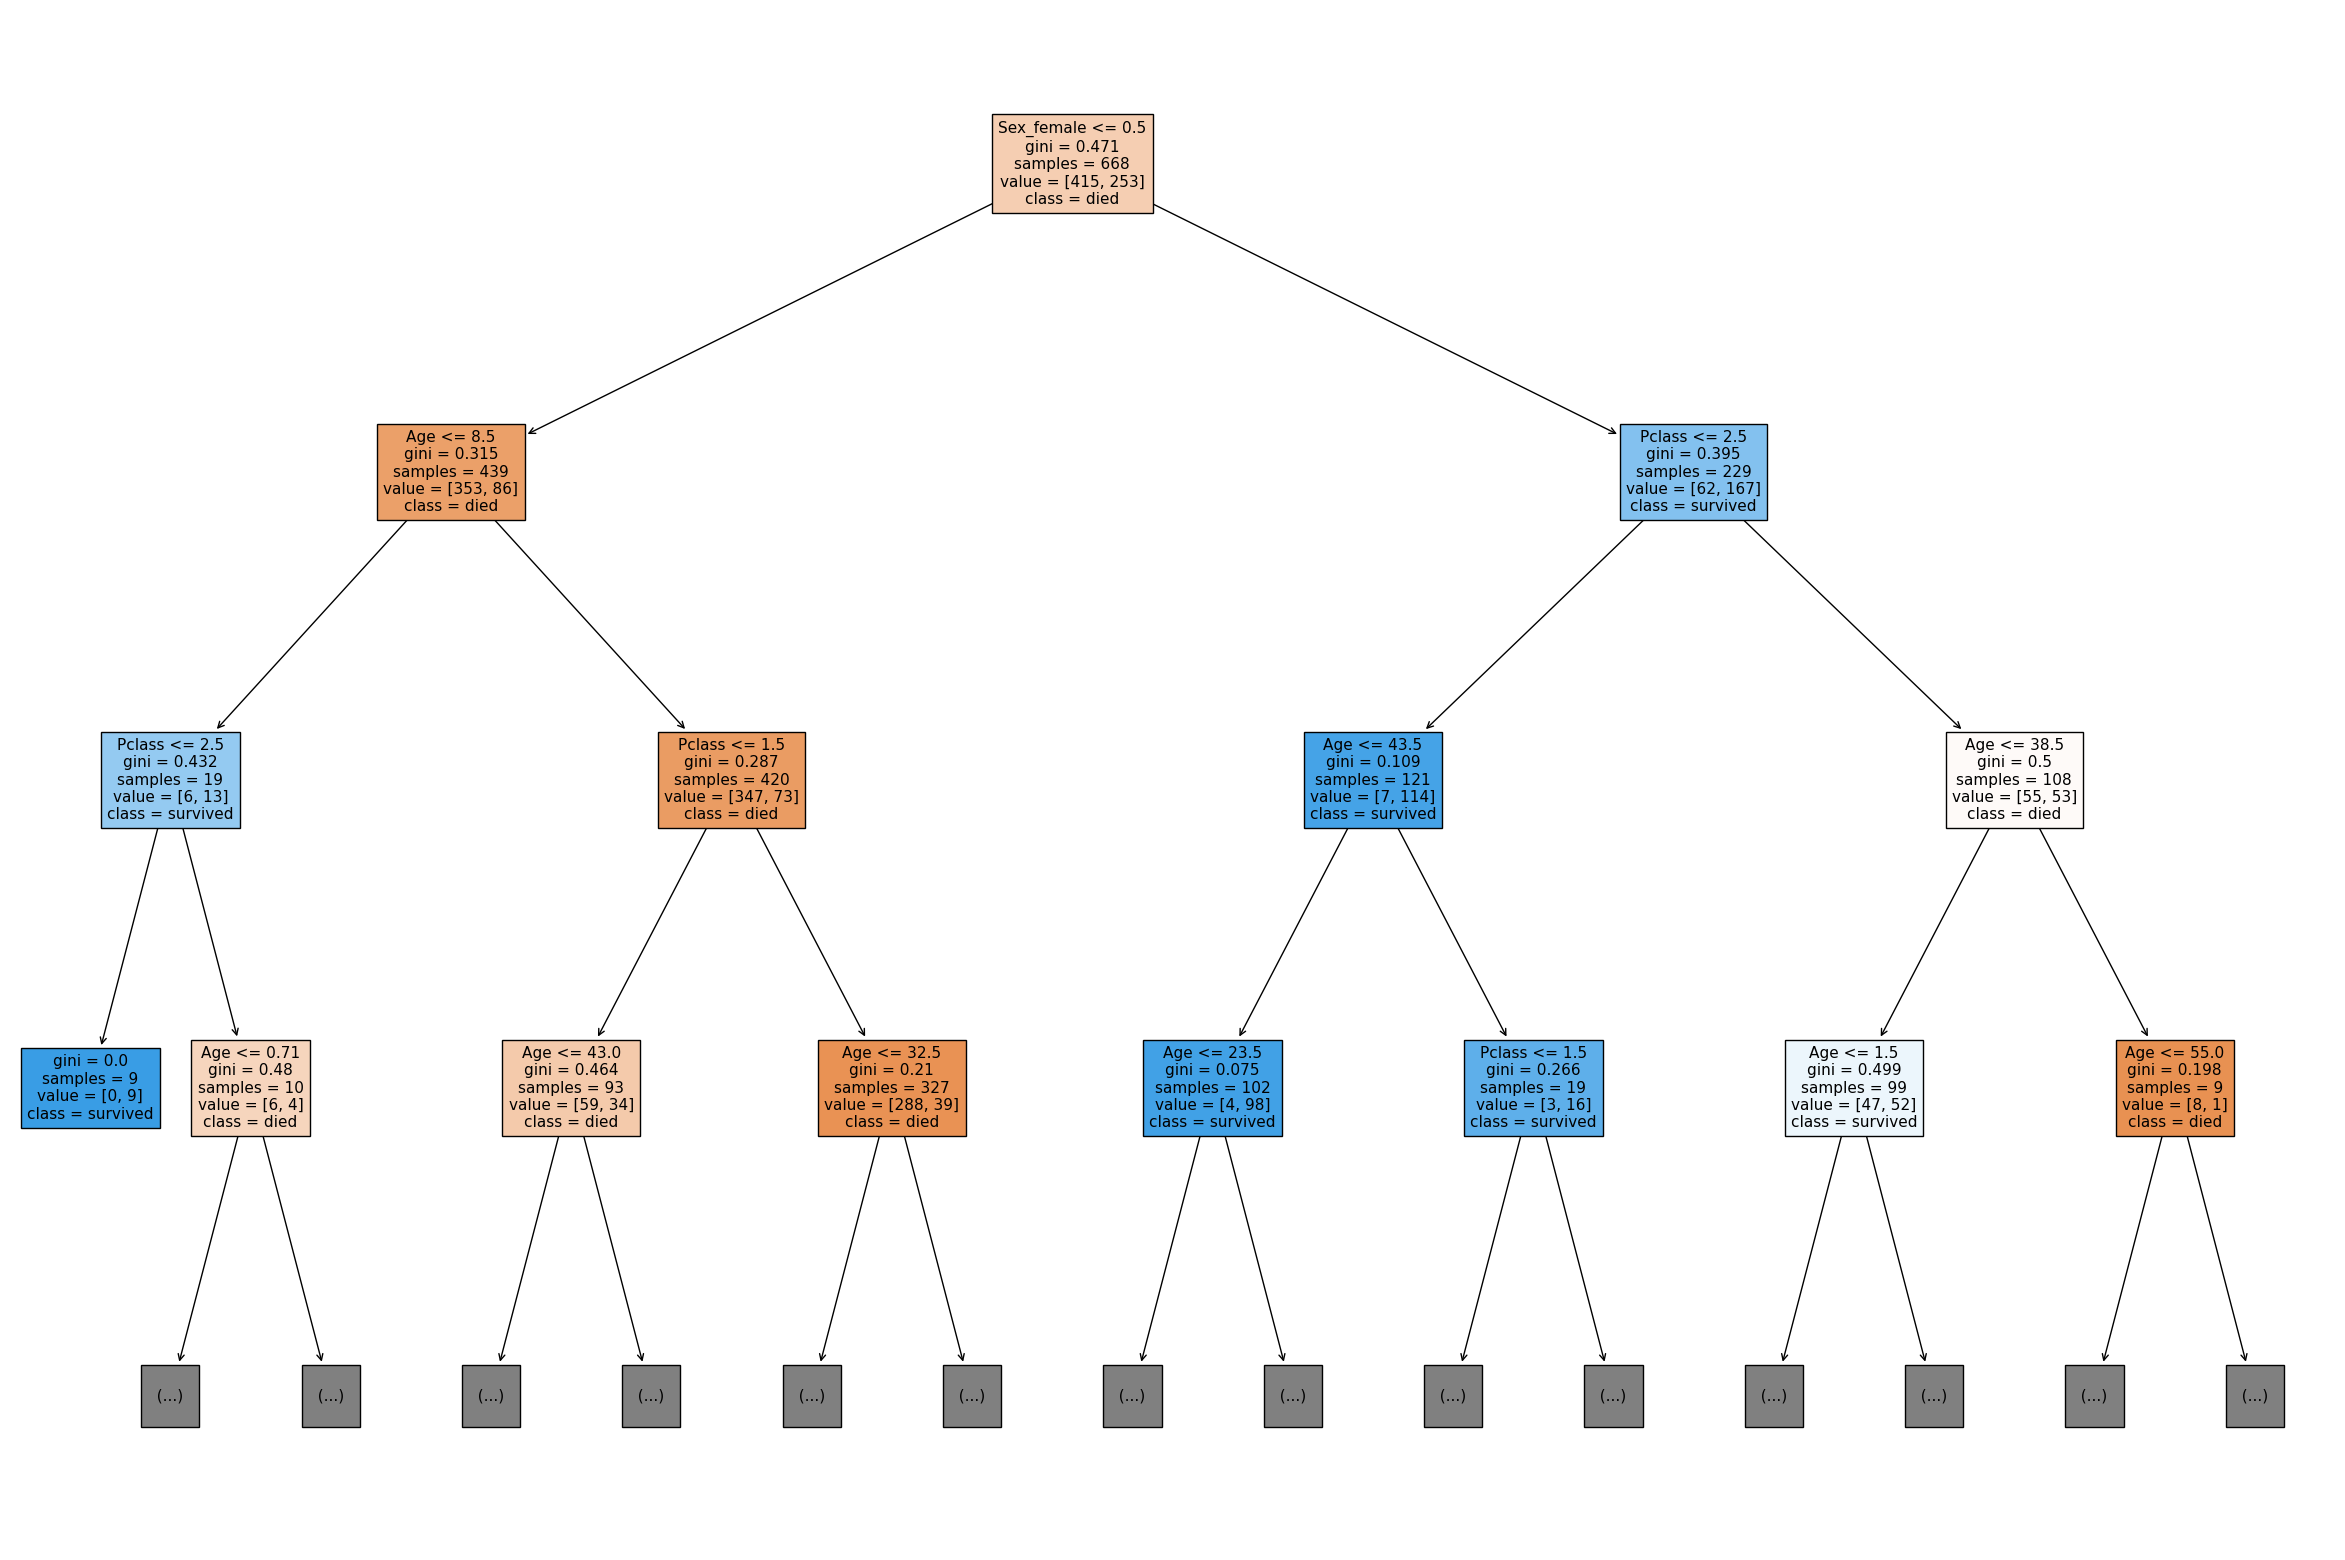

In [19]:
# 树模型可视化
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(30,20))
plot_tree(dtc,max_depth=3,filled=True,feature_names=['Pclass', 'Age', 'Sex_female', 'Sex_male'],class_names=['died','survived'])
plt.show()